In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
pd.read_excel("./hc-test.xlsx")

,Software_ID,Cluster_ID
0,S0060,0
1,S0186,0
2,S0130,0
3,S0569,0
4,S0381,0
...,...,...
484,S0120,43
485,S0191,43
486,S0099,43
487,S0116,43


In [3]:
test = pd.read_csv("../vektordarstellung.csv", delimiter=";")
test = test.drop(["Summe", "ID"], axis=1)
test = test.drop(0, axis=0)
test

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import sklearn.decomposition as SKdecom
pca3 = SKdecom.PCA(n_components=3)
pca2 = SKdecom.PCA(n_components=2)

In [5]:
pca3.fit(test)
pca2.fit(test)

PCA(n_components=2)

In [6]:
X3 = pca3.transform(test)
X2 = pca2.transform(test)

In [7]:
X3 = pd.DataFrame(X3)
X3

,0,1,2
0,0.288584,-0.006085,-0.267015
1,-1.087467,0.132655,0.091681
2,-0.771586,-0.356674,-0.017268
3,-0.477993,-0.259660,0.196001
4,-0.996470,0.103668,0.148654
...,...,...,...
264,-0.672265,0.345521,0.192376
265,-0.090856,-0.216073,-0.284040
266,-0.588129,0.225714,-0.312521
267,-0.974879,0.136307,-0.023846


In [8]:
X2 = pd.DataFrame(X2)
X2

,0,1
0,0.288584,-0.006085
1,-1.087467,0.132655
2,-0.771586,-0.356674
3,-0.477993,-0.259660
4,-0.996470,0.103668
...,...,...
264,-0.672265,0.345521
265,-0.090856,-0.216073
266,-0.588129,0.225714
267,-0.974879,0.136307


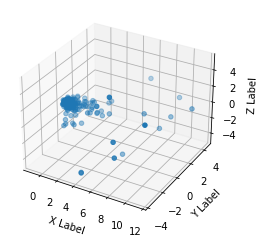

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X3[0], X3[1], X3[2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

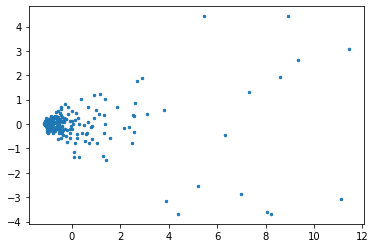

In [10]:
plt.scatter(X2[0], X2[1], s=6)
plt.show()

In [34]:
corrMatrix = pd.DataFrame(test).astype('float64').dropna().corr()
corrMatrix = corrMatrix.drop(["S0227"], axis=0)
corrMatrix = corrMatrix.drop(["S0227"], axis=1)
var = corrMatrix["S0066"]
var[var > 0.5]
#sn.heatmap(corrMatrix, annot=True)
#plt.show()

S0066    1.000000
S0065    0.605418
S0064    0.571915
S0181    0.520935
S0072    0.520935
S0078    0.665327
S0003    0.704453
S0068    0.571915
Name: S0066, dtype: float64

In [40]:
corrMatrix[pd.notna(corrMatrix)]

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0104,S0385,S0067,S0006,S0103,S0111,S0225,S0123,S0248,S0350
S0066,1.000000,0.605418,0.172848,0.291959,-0.007505,-0.016908,0.043782,-0.018557,0.082261,0.086012,...,-0.007505,0.151623,0.279434,-0.007505,-0.007505,-0.007505,-0.007505,-0.007505,0.109495,0.129725
S0065,0.605418,1.000000,0.291560,0.493971,-0.009226,-0.020786,0.166065,-0.022814,0.245069,0.154869,...,-0.009226,0.346348,0.223676,-0.009226,-0.009226,-0.009226,-0.009226,-0.009226,0.304615,0.350154
S0469,0.172848,0.291560,1.000000,0.117034,-0.009985,-0.022495,0.214417,0.133436,0.220705,0.137217,...,-0.009985,0.164632,0.204998,-0.009985,-0.009985,-0.009985,-0.009985,-0.009985,-0.038299,0.084158
S0045,0.291959,0.493971,0.117034,1.000000,-0.018678,-0.042080,0.197876,0.043842,0.166724,0.175149,...,-0.018678,0.482942,0.220719,-0.018678,-0.018678,-0.018678,-0.018678,-0.018678,0.167767,0.272512
S0073,-0.007505,-0.009226,-0.009985,-0.018678,1.000000,-0.008407,-0.023624,-0.009226,-0.017312,-0.016840,...,-0.003731,-0.021642,-0.006487,-0.003731,-0.003731,-0.003731,-0.003731,-0.003731,-0.014313,-0.012613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0111,-0.007505,-0.009226,-0.009985,-0.018678,-0.003731,-0.008407,0.157945,-0.009226,0.215535,0.221578,...,-0.003731,-0.021642,-0.006487,-0.003731,-0.003731,1.000000,-0.003731,-0.003731,0.260699,0.295833
S0225,-0.007505,-0.009226,-0.009985,-0.018678,-0.003731,-0.008407,-0.023624,-0.009226,-0.017312,-0.016840,...,-0.003731,-0.021642,-0.006487,-0.003731,-0.003731,-0.003731,1.000000,-0.003731,-0.014313,-0.012613
S0123,-0.007505,-0.009226,-0.009985,-0.018678,-0.003731,-0.008407,-0.023624,-0.009226,0.215535,-0.016840,...,-0.003731,-0.021642,-0.006487,-0.003731,-0.003731,-0.003731,-0.003731,1.000000,-0.014313,-0.012613
S0248,0.109495,0.304615,-0.038299,0.167767,-0.014313,0.215588,0.257617,0.191279,0.188784,0.066052,...,-0.014313,0.342337,-0.024884,-0.014313,0.260699,0.260699,-0.014313,-0.014313,1.000000,0.374172


In [26]:
pd.DataFrame(test).astype('float64')

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
corrMatrix = pd.DataFrame(test).transpose().astype('float64').dropna().corr()
k = []
for i in range(1,corrMatrix.shape[0]):
    print(   max(corrMatrix[i].drop(i)))
    k.append( max(corrMatrix[i].drop(i)) )
    
max(k)

0.3299195182851473
0.40533541437801346
0.4680321405999034
0.2886361843554435
0.4979633401221884
1.0
0.4028102766097513
0.4053354143780119
0.5199863993681523
0.32809962547899457
0.39951040618257183
0.4979633401221916
0.4979633401221984
0.40239311475733563
0.2327818512485571
0.24349193042159745
0.18591483118346028
0.2870151546517568
0.2643361971991983
0.22828582464057762
0.3802834481891769
0.2443693717774212
0.28983680985010757
0.5921128524039696
0.39717805039823895
0.39849347826879417
0.28395480800474465
0.4979633401221984
0.21718600232673124
0.40533541437801407
0.3509365507598961
0.8156646942309026
0.3509365507598961
0.28395480800474465
0.40533541437801407
0.20960926819971046
0.4053354143780175
0.33007942123264017
0.46706420409300725
0.3580328481264238
0.36100077636952593
0.32925170068026827
0.4401205313840627
0.24726746908458375
0.46706420409301175
0.4153796097370926
0.2583504522822271
0.22541498336190705
0.4008979245120776
0.3192373867934824
0.31313506214926606
0.4040695899681166
0.7

1.0

In [66]:
pd.DataFrame(corrMatrix[6].drop([6]))[6].idmax()

AttributeError: 'Series' object has no attribute 'idmax'

In [68]:
corrMatrixTech = pd.DataFrame(test).transpose().astype('float64').dropna().corr()
corrMatrixTech


,1,2,3,4,5,6,7,8,9,10,...,260,261,262,263,264,265,266,267,268,269
1,1.000000,-0.015059,0.103402,0.238980,0.270487,0.127714,0.328829,-0.015059,0.110425,0.056578,...,0.115306,0.025799,0.167711,0.014296,-0.015059,-0.032176,0.028190,0.094802,-0.021340,0.075569
2,-0.015059,1.000000,-0.008703,-0.008703,-0.004073,-0.004073,-0.008197,-0.004073,-0.011689,-0.007084,...,-0.014438,-0.009642,-0.016246,-0.010911,-0.004073,-0.008703,-0.014751,-0.009183,-0.005772,-0.020961
3,0.103402,-0.008703,1.000000,0.207759,-0.008703,0.229665,-0.017513,0.229665,0.146032,-0.015136,...,0.039559,-0.020600,0.028669,-0.023313,-0.008703,-0.018595,0.037540,-0.019621,-0.012333,0.108543
4,0.238980,-0.008703,0.207759,1.000000,0.229665,0.229665,0.222324,-0.008703,0.231536,-0.015136,...,0.109965,-0.020600,-0.034711,-0.023313,-0.008703,-0.018595,0.037540,-0.019621,-0.012333,0.108543
5,0.270487,-0.004073,-0.008703,0.229665,1.000000,-0.004073,0.244369,-0.004073,0.168394,-0.007084,...,-0.014438,-0.009642,-0.016246,-0.010911,-0.004073,-0.008703,-0.014751,-0.009183,-0.005772,0.086683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.032176,-0.008703,-0.018595,-0.018595,-0.008703,-0.008703,-0.017513,-0.008703,0.060529,-0.015136,...,-0.030847,0.081985,-0.034711,0.067903,-0.008703,1.000000,-0.031517,-0.019621,-0.012333,0.108543
266,0.028190,-0.014751,0.037540,0.037540,-0.014751,0.130694,-0.029684,-0.014751,0.009842,0.058663,...,0.076596,0.027679,0.134530,-0.039513,-0.014751,-0.031517,1.000000,0.163488,-0.020904,0.017649
267,0.094802,-0.009183,-0.019621,-0.019621,-0.009183,-0.009183,-0.018480,-0.009183,-0.026353,0.115259,...,-0.032550,0.075684,0.143943,-0.024599,-0.009183,-0.019621,0.163488,1.000000,-0.013014,0.001280
268,-0.021340,-0.005772,-0.012333,-0.012333,-0.005772,-0.005772,-0.011616,-0.005772,-0.016564,-0.010039,...,-0.020459,0.139425,-0.023022,-0.015462,-0.005772,-0.012333,-0.020904,-0.013014,1.000000,0.046567


In [69]:
corrMatrixTech.to_excel("./corr_techniques.xlsx")

In [78]:
clusterd = pd.read_excel("./clustered.xlsx")
clusterd = clusterd.set_index(["ID"])
clusterd.sort_values(by=["Cluster-ID"], axis=1)

,S0060,S0186,S0130,S0569,S0381,S0374,S0543,S0382,S0486,S0447,...,S0173,S0014,S0005,S0026,S0383,S0120,S0191,S0099,S0116,S0097
ID,,,,,,,,,,,,,,,,,,,,,
created,31 May 2017,16 January 2018,31 May 2017,08 February 2021,28 May 2019,17 April 2019,15 December 2020,29 May 2019,16 July 2020,14 May 2020,...,16 January 2018,31 May 2017,31 May 2017,31 May 2017,29 May 2019,31 May 2017,18 April 2018,31 May 2017,31 May 2017,31 May 2017
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
T1548.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
clustered_t = clusterd.transpose()
Nuller = clustered_t[clustered_t["Cluster-ID"] == 0]
#Nuller = Nuller.drop("created", axis=1)
Nuller["created"] = pd.to_datetime(Nuller["created"])
Nuller = Nuller.sort_values(by='created')
Nuller

ValueError: time data '31 May 2017' does not match format '%d-%m-%Y' (match)

In [105]:
pca3.fit(Nuller)
X_n = pca3.transform(Nuller)
X_n = pd.DataFrame(X_n)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_n[0], X_n[1], X_n[2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

clb = plt.gci().colorbar # get the colorbar artist
# get the old tick labels (index numbers of the dataframes)
clb_ticks = [int(t.get_text()) for t in clb.ax.yaxis.get_ticklabels()]
# convert the old, index, ticks into year-month-day format
new_ticks = AAPL.index[clb_ticks].strftime("%Y-%m-%d")
clb.ax.yaxis.set_ticklabels(new_ticks)

plt.show()

ValueError: could not convert string to float: '05 May 2020'